## Calculating P(m,n)


Load in numpy and ypred_module. 

Currently the path to the model is './models/20220422_cheb_hyp_MODEL' but if you save it to another directory, change that at the top of ypred_module.py before importing.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import ypred_module as ypm

Define some p vector (log of b, beta, gamma) as an array.

In [33]:
p = np.array([1.0048,  -0.6288,  -0.6148])

And get the probability at n, m!

In [38]:
ypm.get_prob(p,nas=7,mat=8)

5.076373984013685e-05

# Plotting


Compare predictions to stored ground truth. 


First load in data.

In [43]:
path ='/home/mcarilli/CME/2D_CME/learning_environment/training_data_quadvec/'

data_array = np.load(path+'256_0.npy',allow_pickle=True)

Choose a pdf to plot.

In [81]:
i = 103

pdf = data_array[i][1]
p = data_array[i][0]

pdf.shape

(31, 55)

In [82]:
predicted = np.zeros((pdf.shape))

for n in range(pdf.shape[0]):
    for m in range(pdf.shape[1]):
        
        P = ypm.get_prob(p,n,m)
        predicted[n,m] = P


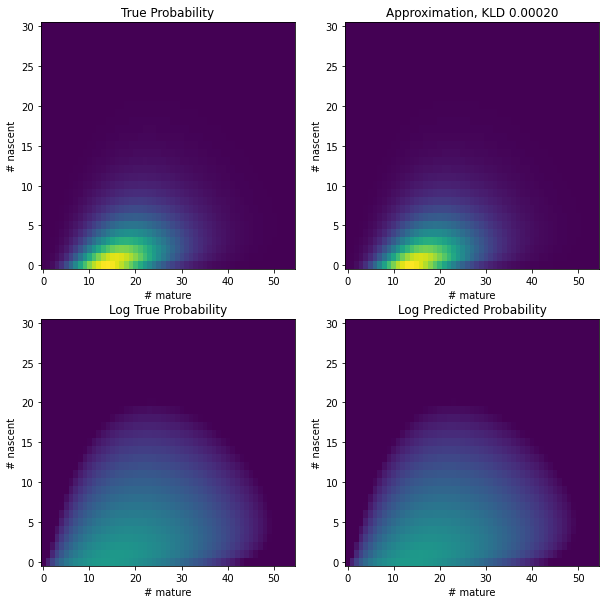

In [83]:
P = pdf
Papprox = predicted

Plog = np.log(P)
Papproxlog = np.log(Papprox)

fig1,ax1=plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1[0,0].imshow(P,aspect='auto')
ax1[0,0].invert_yaxis()
ax1[0,0].set_title('True Probability')
ax1[0,0].set_xlabel('# mature')
ax1[0,0].set_ylabel('# nascent')

KLD = -np.sum(P.flatten()*np.log(Papprox.flatten()/P.flatten()))
ax1[0,1].imshow(Papprox,aspect='auto')
ax1[0,1].invert_yaxis()
ax1[0,1].set_title(f'Approximation, KLD {KLD:.5f}')
ax1[0,1].set_xlabel('# mature')
ax1[0,1].set_ylabel('# nascent')


ax1[1,0].imshow(Plog,aspect='auto',vmin=-10,vmax=0)
ax1[1,0].invert_yaxis()
ax1[1,0].set_title(f'Log True Probability')
ax1[1,0].set_xlabel('# mature')
ax1[1,0].set_ylabel('# nascent')

ax1[1,1].imshow(Papproxlog,aspect='auto',vmin=-10,vmax=0)
ax1[1,1].invert_yaxis()
ax1[1,1].set_title(f'Log Predicted Probability')
ax1[1,1].set_xlabel('# mature')
ax1[1,1].set_ylabel('# nascent');